In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

In [2]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [3]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}

In [9]:
from data_prep.team_history import History
team_df = History(mapping, proxyDict).generate_team_history()

Richmond 1
Richmond 2
Richmond 3
Richmond 4
Richmond 5
Richmond 6
Richmond 7
Richmond 8
Richmond 9
Richmond 10
Richmond 11
Richmond 12
Richmond 13
Richmond 14
Richmond 15
West Coast 1
West Coast 2
West Coast 3
West Coast 4
West Coast 5
West Coast 6
West Coast 7
West Coast 8
West Coast 9
West Coast 10
West Coast 11
West Coast 12
West Coast 13
West Coast 14
West Coast 15
Sydney 1
Sydney 2
Sydney 3
Sydney 4
Sydney 5
Sydney 6
Sydney 7
Sydney 8
Sydney 9
Sydney 10
Sydney 11
Sydney 12
Sydney 13
Sydney 14
Sydney 15
Adelaide 1
Adelaide 2
Adelaide 3
Adelaide 4
Adelaide 5
Adelaide 6
Adelaide 7
Adelaide 8
Adelaide 9
Adelaide 10
Adelaide 11
Adelaide 12
Adelaide 13
Adelaide 14
Adelaide 15
Geelong 1
Geelong 2
Geelong 3
Geelong 4
Geelong 5
Geelong 6
Geelong 7
Geelong 8
Geelong 9
Geelong 10
Geelong 11
Geelong 12
Geelong 13
Geelong 14
Geelong 15
Greater Western Sydney 1
Greater Western Sydney 2
Greater Western Sydney 3
Greater Western Sydney 4
Greater Western Sydney 5
Greater Western Sydney 6
Greater We

In [10]:
from data_prep.team_history import History
History(mapping, proxyDict).generate_game_data('training-all/', team_df)

2018 Richmond
2018 West Coast
2018 Sydney
2018 Adelaide
2018 Geelong
2018 Greater Western Sydney
2018 Melbourne
2018 Port Adelaide
2018 Collingwood
2018 Hawthorn
2018 Essendon
2018 Western Bulldogs
2018 St Kilda
2018 North Melbourne
2018 Fremantle
2018 Brisbane Lions
2018 Gold Coast
2018 Carlton
2017 Richmond
2017 West Coast
2017 Sydney
2017 Adelaide
2017 Geelong
2017 Greater Western Sydney
2017 Melbourne
2017 Port Adelaide
2017 Collingwood
2017 Hawthorn
2017 Essendon
2017 Western Bulldogs
2017 St Kilda
2017 North Melbourne
2017 Fremantle
2017 Brisbane Lions
2017 Gold Coast
2017 Carlton
2016 Richmond
2016 West Coast
2016 Sydney
2016 Adelaide
2016 Geelong
2016 Greater Western Sydney
2016 Melbourne
2016 Port Adelaide
2016 Collingwood
2016 Hawthorn
2016 Essendon
2016 Western Bulldogs
2016 St Kilda
2016 North Melbourne
2016 Fremantle
2016 Brisbane Lions
2016 Gold Coast
2016 Carlton
2015 Richmond
2015 West Coast
2015 Sydney
2015 Adelaide
2015 Geelong
2015 Greater Western Sydney
2015 Melbour

2004 Brisbane Lions
2004 Carlton


In [429]:
X_list = []
y_list = []

for i in range(1,16):
    X = np.load('training-all/training-'+str(2019-i)+'.npy')

    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 17)
(2789,)
Wins vs losses 0.5769092864826103


In [430]:
from data_prep.feature_eng import Features
cols = Features().cols()
pd.DataFrame(X_list[0], columns=cols).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_R_mean,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_R_mean,a_perc
0,3.0,101.500000,19.500000,106.500000,11.500000,-5.000000,11.500000,0.500000,0.953052,109.500000,8.500000,92.000000,25.000000,17.500000,25.000000,1.000000,1.190217
1,4.0,101.666667,15.923428,100.666667,12.498889,1.000000,12.498889,0.666667,1.009934,82.666667,7.363574,101.333333,4.189935,-18.666667,4.189935,0.000000,0.815789
2,7.0,105.000000,12.192894,74.166667,32.121730,30.833333,32.121730,0.833333,1.415730,83.666667,21.898757,82.166667,17.686310,1.500000,17.686310,0.500000,1.018256
3,10.0,100.555556,13.953185,75.555556,34.944754,25.000000,34.944754,0.777778,1.330882,65.111111,17.329772,93.444444,10.510430,-28.333333,10.510430,0.222222,0.696790
4,15.0,97.307692,17.397545,72.076923,30.406127,25.230769,30.406127,0.769231,1.350053,88.307692,18.938705,70.230769,14.337438,18.076923,14.337438,0.769231,1.257393


In [ ]:
from modelling.training import Training
scores, best_models = Training(100, 70).train(X_list, y_list)

Season 2018
Bayes CV search took 407.05 seconds for 100 candidates parameter settings.
val. score: 66.06789176042219
test score: 26.857087915624337
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.5445254961592293,
       colsample_bynode=0.12547545671163113, colsample_bytree=1.0,
       gamma=0.00035903164344815717, learning_rate=0.0075525421005449645,
       max_delta_step=2, max_depth=3, min_child_weight=2, missing=None,
       n_estimators=601, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.0,
       reg_lambda=0.32826847164361916, scale_pos_weight=0.9089004189948283,
       seed=None, silent=True, subsample=0.10383125513276387)

Season 2017
Bayes CV search took 331.06 seconds for 100 candidates parameter settings.
val. score: 65.14209833791247
test score: 16.402037344008797
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.2638997059435783,
       colsample_bynode

In [ ]:
print(np.mean(scores))

In [ ]:
def averagingImp(models=[]):
    predictions = np.column_stack([
        model.feature_importances_ for model in models
    ])
    return np.mean(predictions, axis=1)

imp = pd.DataFrame(data=averagingImp(best_models),
             index=cols, 
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp

In [409]:
def averagingModels(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return np.mean(predictions, axis=1)

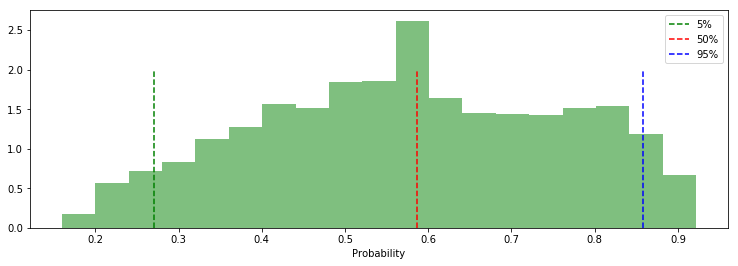

In [410]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = averagingModels(np.concatenate(X_list, axis=0), best_models)
x = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [411]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows)

,base_score,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,missing,n_estimators,n_jobs,nthread,objective,random_state,reg_alpha,reg_lambda,scale_pos_weight,seed,silent,subsample
0,0.575746,gbtree,0.559039,0.690793,0.954713,0,0.015189,0,3,1,None,223,-1,None,binary:logistic,0,1.000000,0.069741,1,None,True,0.563442
1,0.575746,gbtree,0.567275,0.564671,0.609770,0,0.007823,0,3,1,None,500,-1,None,binary:logistic,0,0.204300,0.229915,1,None,True,0.172815
2,0.575746,gbtree,0.100000,1.000000,0.781511,0,0.027714,0,3,1,None,170,-1,None,binary:logistic,0,1.000000,0.000000,1,None,True,0.100000
3,0.575746,gbtree,0.743187,0.169670,1.000000,0,0.012847,0,4,1,None,265,-1,None,binary:logistic,0,0.270178,0.456803,1,None,True,0.167369
4,0.575746,gbtree,0.678702,0.261621,0.690889,0,0.011458,0,3,1,None,450,-1,None,binary:logistic,0,0.314855,0.487735,1,None,True,0.687214
5,0.575746,gbtree,0.526639,0.100000,1.000000,0,0.012489,0,4,1,None,289,-1,None,binary:logistic,0,0.000000,1.000000,1,None,True,0.295074
6,0.575746,gbtree,0.391608,0.205828,0.558761,0,0.008864,0,4,1,None,494,-1,None,binary:logistic,0,0.626899,1.000000,1,None,True,0.100000
7,0.575746,gbtree,0.100000,0.486142,0.935617,0,0.016820,0,3,1,None,254,-1,None,binary:logistic,0,1.000000,1.000000,1,None,True,0.100000
8,0.575746,gbtree,0.100000,0.155644,0.518266,0,0.012038,0,3,1,None,500,-1,None,binary:logistic,0,1.000000,1.000000,1,None,True,0.102725
9,0.575746,gbtree,0.303981,0.713897,0.920024,0,0.007804,0,4,1,None,317,-1,None,binary:logistic,0,0.801640,0.143176,1,None,True,0.189840


## Scoring

In [112]:
from data_prep.web_scraping import Scrape

games = []
start = 122
for i in range(start,start+9):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

/Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py:35: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 35 of the file /Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text, "html")


[['North Melbourne', 'Richmond'],
 ['Collingwood', 'Fremantle'],
 ['Greater Western Sydney', 'Gold Coast'],
 ['Geelong', 'Sydney'],
 ['Brisbane Lions', 'Hawthorn'],
 ['Melbourne', 'Adelaide'],
 ['St Kilda', 'Port Adelaide'],
 ['Essendon', 'Carlton'],
 ['West Coast', 'Western Bulldogs']]

In [113]:
from modelling.scoring import Scoring
scoring = Scoring(mapping, proxyDict).score_data(games)

In [114]:
pd.DataFrame(scoring, columns=cols)[imp.iloc[:10,:].index]

,h_perc,h_M_mean,a_M_mean,a_perc,h_R_mean,a_A_mean,h_A_mean,a_R_mean,h_F_mean,a_F_mean
0,0.864662,-12.6,4.9,1.061713,0.3,79.4,93.1,0.7,80.5,84.3
1,1.275342,20.1,6.6,1.094286,0.8,70.0,73.0,0.5,93.1,76.6
2,1.299728,22.0,-20.2,0.753358,0.7,81.9,73.4,0.3,95.4,61.7
3,1.457849,31.5,-12.8,0.854545,0.9,88.0,68.8,0.3,100.3,75.2
4,1.031034,2.7,2.9,1.037760,0.6,76.8,87.0,0.5,89.7,79.7
5,0.758206,-22.1,8.4,1.117812,0.3,71.3,91.4,0.5,69.3,79.7
6,0.917284,-6.7,2.4,1.030341,0.5,79.1,81.0,0.5,74.3,81.5
7,0.978344,-1.7,-21.4,0.767138,0.4,91.9,78.5,0.1,76.8,70.5
8,1.015915,1.2,-5.2,0.940092,0.7,86.8,75.4,0.4,76.6,81.6


In [412]:
def modelStats(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return [np.mean(predictions, axis=1), np.median(predictions, axis=1), np.std(predictions, axis=1), 
            np.max(predictions, axis=1), np.min(predictions, axis=1)]

arr = np.c_[ games, modelStats(scoring,best_models)[0],
           modelStats(scoring,best_models)[1],modelStats(scoring,best_models)[2],
            modelStats(scoring,best_models)[3], modelStats(scoring,best_models)[4]] 
pd.DataFrame(arr,columns=['home','away','prob_avg', 'prob_med', 'prob_std', 'prob_max', 'prob_min'])

,home,away,prob_avg,prob_med,prob_std,prob_max,prob_min
0,North Melbourne,Richmond,0.39280432,0.39526105,0.019071223,0.41761187,0.3553432
1,Collingwood,Fremantle,0.62143934,0.61797196,0.022677656,0.66449416,0.5844215
2,Greater Western Sydney,Gold Coast,0.81372094,0.8141787,0.015557591,0.84135365,0.7762463
3,Geelong,Sydney,0.79428005,0.7948716,0.018658374,0.8397555,0.7462272
4,Brisbane Lions,Hawthorn,0.6025612,0.59793526,0.02111029,0.63151467,0.57179016
5,Melbourne,Adelaide,0.3083822,0.3100199,0.025747787,0.33879662,0.23202577
6,St Kilda,Port Adelaide,0.49427736,0.49357748,0.018720578,0.51853704,0.45858705
7,Essendon,Carlton,0.7825845,0.782067,0.017728722,0.8260749,0.7509206
8,West Coast,Western Bulldogs,0.66070044,0.66514975,0.03074628,0.7273417,0.5982574


## Save models

In [413]:
from joblib import dump
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [385]:
from joblib import load
best_models = []
for i in range(15):
    best_models.append(load('models/model'+str(i)+'.joblib'))

## Simulate

In [414]:
overall = []
def afl_loss(y_true, y_pred):
    return np.sum(1 + np.log2(y_true * y_pred + (1 - y_true) * (1 - y_pred)))
for i in range(15):
    season_scores = []
    for rnd in range(1,24):
        df = pd.DataFrame(np.c_[X_list[i],y_list[i]])
        y_new = df[df[0] == rnd][17].values
        x_new = df[df[0] == rnd].drop(17, axis=1).values
        score = afl_loss(y_new,best_models[i].predict_proba(x_new)[:,1])
        season_scores.append(score)
    overall.append(season_scores)

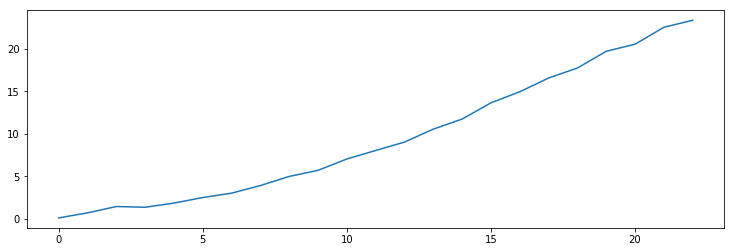

In [415]:
plt.figure(figsize=(12.5,4))
plt.plot(np.cumsum(np.array(np.matrix(np.array(overall)).mean(0)).flatten()))

In [416]:
from modelling.scoring import Simulate
Simulate(mapping,proxyDict).generate_past_scores('training-all', best_models, team_df, seasons=16)

['Richmond', 'West Coast', 'Sydney', 'Adelaide', 'Geelong', 'Melbourne', 'Port Adelaide', 'Collingwood', 'Hawthorn', 'Essendon', 'Western Bulldogs', 'St Kilda', 'North Melbourne', 'Fremantle', 'Brisbane Lions', 'Carlton']


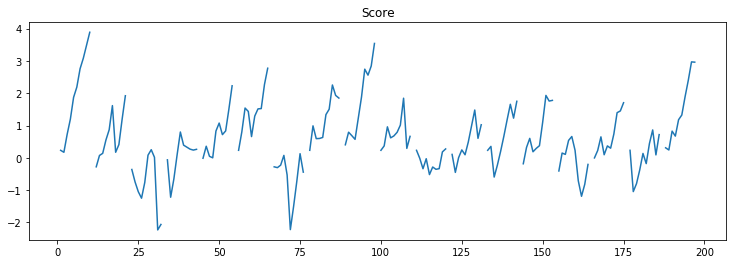

In [421]:
year = 2018
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,0])
plt.title('Score')
print(teams)

['Richmond', 'West Coast', 'Sydney', 'Adelaide', 'Geelong', 'Melbourne', 'Port Adelaide', 'Collingwood', 'Hawthorn', 'Essendon', 'Western Bulldogs', 'St Kilda', 'North Melbourne', 'Fremantle', 'Brisbane Lions', 'Carlton']


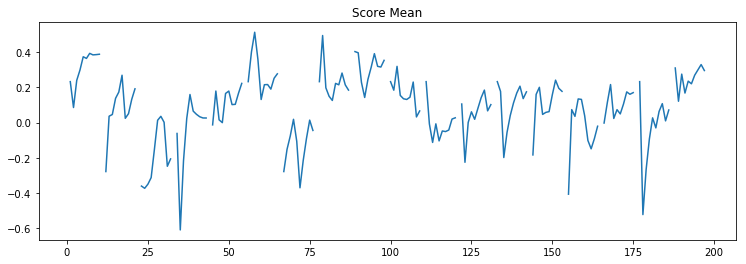

In [422]:
plt.figure(figsize=(12.5,4))
plt.plot(np.load('training-all/scores-'+str(year)+'.npy')[:,2])
plt.title('Score Mean')
print(teams)

In [424]:
X_list = []
y_list = []

for i in range(1,16):
    X = np.c_[np.load('training-all/training-'+str(2019-i)+'.npy'),
                        np.load('training-all/scores-'+str(2019-i)+'.npy')[:,1:]] ## drop score

    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 19)
(2789,)
Wins vs losses 0.577626389386877


In [425]:
from modelling.training import Training
scores, best_models = Training(50, 70).train(X_list, y_list)

Season 2018
Bayes CV search took 115.35 seconds for 50 candidates parameter settings.
val. score: 67.03483719638449
test score: 26.235842846324466
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.48435301147697163,
       colsample_bynode=0.3583297901177822, colsample_bytree=1.0, gamma=0,
       learning_rate=0.020343810396609974, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=216, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.8160253749954158, reg_lambda=0.0, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.3447329664320996)

Season 2017
Bayes CV search took 125.41 seconds for 50 candidates parameter settings.
val. score: 68.79390287542324
test score: 9.974900735444777
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.6921483872498045, colsample_bynode=1.0,
       colsample_bytree=0.2151759557229856, gamma=0,

Interrupting!
Season 2006
Bayes CV search took 53.58 seconds for 50 candidates parameter settings.
val. score: 70.10943836382003
test score: 11.976724746603097
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.20927890997167786, colsample_bynode=0.1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.010135499389414144,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=464, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0,
       reg_alpha=0.9928154072433154, reg_lambda=0.0, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.1)

Season 2005
Bayes CV search took 128.05 seconds for 50 candidates parameter settings.
val. score: 69.81251072397397
test score: 13.703863115354775
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.49472531342471715,
       colsample_bynode=0.7226228333872312,
       colsample_bytree=0.6734875397238864, g

In [426]:
np.mean(scores)

23.269084400019317

In [427]:
from data_prep.feature_eng import Features
cols = Features().cols()+['score-std', 'score-mean']
imp = pd.DataFrame(data=averagingImp(best_models),
             index=cols, 
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp

,importance
h_perc,0.081562
a_M_mean,0.077710
h_M_mean,0.077585
a_perc,0.073759
h_R_mean,0.069945
a_A_mean,0.065805
a_R_mean,0.062461
h_A_mean,0.062311
a_F_mean,0.053047
h_F_mean,0.052910


In [428]:
# from joblib import dump
# for i in range(len(best_models)):
#     dump(best_models[i], 'models/simulated_model'+str(i)+'.joblib') 